# EDA on the tv show data including genre and the ordinal data for MPAA rating from IMDB (outliers here were fixed)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

### df has fixed outliers for num of episodes per season, it has the genres all spread out as dummy variables, and it has the mpaa rating as an column of ordinal data

In [8]:
# Load data
df = pd.read_pickle('Ordinal_MPAA_merged_with_dummy_genres.pkl')

# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 974
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    849 non-null    object 
 1   Start_Year               849 non-null    int64  
 2   End_Year                 849 non-null    int64  
 3   Genres                   849 non-null    object 
 4   Num_of_Seasons           849 non-null    int64  
 5   Num_of_Episodes          849 non-null    int64  
 6   Num_Episodes_Per_Season  849 non-null    float64
 7   Season_1_Rating          849 non-null    float64
 8   Years_Ran                849 non-null    int64  
 9   Action                   849 non-null    int64  
 10  Adventure                849 non-null    int64  
 11  Animation                849 non-null    int64  
 12  Biography                849 non-null    int64  
 13  Comedy                   849 non-null    int64  
 14  Crime                    8

In [9]:
# Load a copy in case i mess up
copy_df = pd.read_pickle('Ordinal_MPAA_merged_with_dummy_genres.pkl')

In [10]:
df.head(3)

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,...,Other,Romance,Sci-fi,Sport,Thriller,War,MPAA_Rating,Runtime,Series_Type,Ordinal_MPAA
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1,0,...,0,0,0,0,1,0,TV-MA,5h 30min,TV Mini-Series (2019),6
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8,1,...,0,0,0,0,0,0,TV-MA,57min,TV Series (2011–2019),6
2,Black Mirror,2011,0,"[Drama, Sci-fi, Thriller]",5,22,4.40,8.1,9,0,...,0,0,1,0,1,0,TV-MA,1h,TV Series (2011– ),6


In [11]:
df.shape

(849, 33)

In [12]:
df.corr()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA
Start_Year,1.000000,-0.360272,-0.580447,-0.556898,-0.392282,-0.029375,-0.608181,-0.072238,-0.056559,-0.126022,...,0.057430,0.007171,-0.032745,0.025865,-0.087784,0.075423,0.016713,0.100151,-0.007639,0.261074
End_Year,-0.360272,1.000000,0.010948,0.049464,0.107454,0.037614,-0.049929,0.034692,0.028229,-0.037211,...,-0.035157,0.029110,0.078913,-0.086687,0.013293,0.032784,-0.001601,-0.096940,0.025064,-0.083978
Num_of_Seasons,-0.580447,0.010948,1.000000,0.879695,0.378964,-0.003410,0.867581,-0.018304,0.004952,0.059828,...,-0.039589,-0.035152,0.039057,0.081743,0.067686,-0.091731,-0.003064,-0.039530,-0.031715,-0.177614
Num_of_Episodes,-0.556898,0.049464,0.879695,1.000000,0.653810,-0.008588,0.767565,0.058196,0.055767,0.129836,...,-0.040683,-0.025023,0.005473,0.019792,0.107980,-0.089435,-0.006540,-0.067346,-0.025330,-0.264350
Num_Episodes_Per_Season,-0.392282,0.107454,0.378964,0.653810,1.000000,-0.002345,0.325765,0.247467,0.214208,0.309864,...,-0.022497,0.013479,-0.037098,-0.038994,0.035535,-0.041617,-0.025657,-0.085243,-0.010205,-0.353821
Season_1_Rating,-0.029375,0.037614,-0.003410,-0.008588,-0.002345,1.000000,0.006950,-0.034237,-0.101552,0.028011,...,-0.162816,0.024774,-0.055088,-0.024126,0.058774,-0.086177,0.002859,0.014341,0.066823,0.041793
Years_Ran,-0.608181,-0.049929,0.867581,0.767565,0.325765,0.006950,1.000000,-0.048236,-0.023466,0.083765,...,-0.041025,-0.029152,0.056814,0.022208,0.070771,-0.105965,-0.019956,-0.034724,-0.035937,-0.162259
Action,-0.072238,0.034692,-0.018304,0.058196,0.247467,-0.034237,-0.048236,1.000000,0.449331,0.284184,...,-0.096580,-0.057837,-0.199617,-0.053939,-0.143292,0.001515,-0.064017,-0.083349,-0.006856,-0.136778
Adventure,-0.056559,0.028229,0.004952,0.055767,0.214208,-0.101552,-0.023466,0.449331,1.000000,0.374108,...,-0.100790,-0.046193,-0.172610,-0.011800,-0.098364,-0.049695,-0.051129,-0.131681,-0.034348,-0.334098
Animation,-0.126022,-0.037211,0.059828,0.129836,0.309864,0.028011,0.083765,0.284184,0.374108,1.000000,...,-0.027585,0.008306,-0.143616,-0.010242,-0.069646,-0.067649,-0.035664,-0.091852,-0.023959,-0.320104


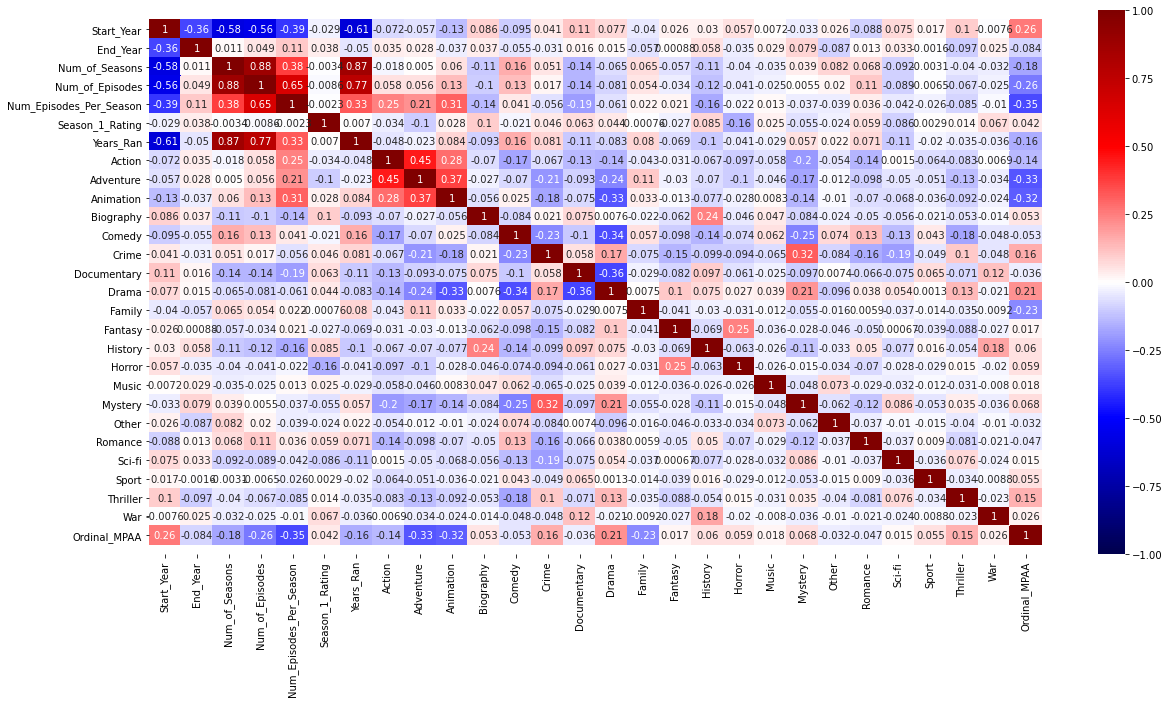

In [13]:
# try a heatmap for the corr matrix
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


In [14]:
df.describe()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA
count,849.000000,849.000000,849.00000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,2013.588928,1295.850412,3.26384,44.823322,11.643828,8.078210,3.424028,0.237927,0.166078,0.088339,...,0.061249,0.010601,0.175501,0.017668,0.070671,0.088339,0.012956,0.080094,0.005889,5.288575
std,5.937324,965.916421,3.06896,59.054076,5.870302,0.509169,3.480293,0.426065,0.372370,0.283955,...,0.239927,0.102473,0.380619,0.131819,0.256426,0.283955,0.113153,0.271599,0.076560,0.916502
min,1995.000000,0.000000,1.00000,2.000000,1.000000,5.400000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,1.00000,10.000000,8.000000,7.800000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2015.000000,2012.000000,2.00000,23.000000,10.000000,8.100000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,2018.000000,2018.000000,4.00000,52.000000,13.000000,8.400000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,2020.000000,2021.000000,28.00000,478.000000,44.000000,9.600000,23.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [15]:
features = ['Start_Year', 'Num_Episodes_Per_Season', 'Season_1_Rating',
            'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
            'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
            'History', 'Horror', 'Music', 'Mystery', 'Other', 'Romance', 
            'Sci-fi', 'Sport', 'Thriller', 'War', 'Ordinal_MPAA']

In [16]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = df[features]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = df['Num_of_Seasons']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [17]:
lr.score(X, y)

0.41424191573273106

In [18]:
# print out intercept
print(lr.intercept_)

# print out other coefficients
print(lr.coef_)

518.5936968713403
[-0.25615513  0.10747986 -0.07099178 -0.60509342 -0.14535725 -0.53169141
 -0.40914829  0.40632318  0.5802778  -1.0590445  -0.35934737  1.02046466
 -0.32059483 -0.435144   -0.0501438  -1.37263668 -0.03444453  2.24255597
  0.0389275  -0.36090488  0.2174452   0.19458611 -0.59302479  0.01748475]


In [19]:
#add a constant since statsmodels.api does not add one by default
#Note: statsmodels.api does not include constant by default
# Add a column of ones with sm.add_constant()
sm.add_constant(X).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA
0,1.0,2019,5.00,9.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1,1.0,2011,9.12,9.1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1.0,2011,4.40,8.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,6
3,1.0,2010,3.00,8.8,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,5
4,1.0,2008,12.40,8.8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,6


In [20]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     24.28
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           2.18e-79
Time:                        20:42:00   Log-Likelihood:                -1929.2
No. Observations:                 849   AIC:                             3908.
Df Residuals:                     824   BIC:                             4027.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     518.5937     31.182     16.631      0.000     457.388     579.799
Start_Year                 -0.2562      0.015    -16.560      0.000      -0.287      -0.226
Num_Episodes_Per_Season     0.1075      0.017      6.349      0.000       0.074       0.141
Season_1_Rating            -0.0710      0.168     -0.424      0.672      -0.400       0.258
Action                     -0.6051      0.243     -2.486      0.013      -1.083      -0.127
Adventure                  -0.1454      0.284     -0.512      0.609      -0.703       0.412
Animation                  -0.5317      0.351     -1.514      0.130      -1.221       0.157
Biography                  -0.4091      0.497     -0.823      0.411      -1.385       0.567
Comedy                      0.4063      0.252      1.615      0.107      -0.088       0.900
Crime                       0.5803      0.224      2.588      0.010       0.140       1.020
Documentary                -1.0590      0.466     -2.274      0.023      -1.973      -0.145
Drama                      -0.3593      0.253     -1.418      0.156      -0.857       0.138
Family                      1.0205      0.726      1.405      0.160      -0.405       2.446
Fantasy                    -0.3206      0.290     -1.106      0.269      -0.890       0.248
History                    -0.4351      0.395     -1.102      0.271      -1.210       0.340
Horror                     -0.0501      0.374     -0.134      0.893      -0.784       0.684
Music                      -1.3726      0.815     -1.684      0.093      -2.972       0.227
Mystery                    -0.0344      0.256     -0.135      0.893      -0.536       0.467
Other                       2.2426      0.639      3.509      0.000       0.988       3.497
Romance                     0.0389      0.346      0.113      0.910      -0.640       0.718
Sci-fi                     -0.3609      0.317     -1.137      0.256      -0.984       0.262
Sport                       0.2174      0.735      0.296      0.767      -1.225       1.659
Thriller                    0.1946      0.326      0.598      0.550      -0.445       0.834
War                        -0.5930      1.101     -0.538      0.590      -2.755       1.569
Ordinal_MPAA                0.0175      0.107      0.163      0.871      -0.194       0.228
==============================================================================
Omnibus:                      398.961   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4705.116
Skew:                           1.821   Prob(JB):                         0.00
Kurtosis:                      13.943   Cond. No.                     7.68e+05
==============================================================================

Warnings:
[1] Standard Errors as

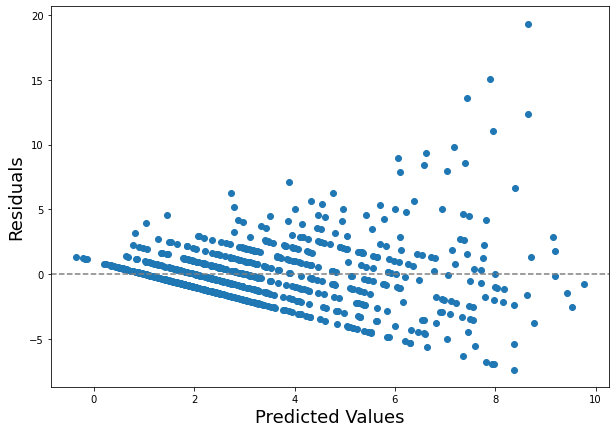

In [21]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

### Can try a few things, 

- Can try to apply log to y and see if we get a better residual

- Can try polynomial regression

- Can try Ridge and Lasso regression

Polynomial regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.6989177714615948

Holy moly my score went up like crazy!

wait could this be overfitting?

## Gonna try applying log to the target variable

In [33]:
df.head()

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,...,Other,Romance,Sci-fi,Sport,Thriller,War,MPAA_Rating,Runtime,Series_Type,Ordinal_MPAA
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1,0,...,0,0,0,0,1,0,TV-MA,5h 30min,TV Mini-Series (2019),6
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8,1,...,0,0,0,0,0,0,TV-MA,57min,TV Series (2011–2019),6
2,Black Mirror,2011,0,"[Drama, Sci-fi, Thriller]",5,22,4.40,8.1,9,0,...,0,0,1,0,1,0,TV-MA,1h,TV Series (2011– ),6
3,Sherlock,2010,2017,"[Drama, Crime, Mystery]",4,12,3.00,8.8,7,0,...,0,0,0,0,0,0,TV-14,1h 28min,TV Series (2010–2017),5
4,Breaking Bad,2008,2013,"[Drama, Crime, Thriller]",5,62,12.40,8.8,5,0,...,0,0,0,0,1,0,TV-MA,49min,TV Series (2008–2013),6


In [34]:
df['log_num_seasons'] = np.log(df['Num_of_Seasons'])
df.head()

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,...,Romance,Sci-fi,Sport,Thriller,War,MPAA_Rating,Runtime,Series_Type,Ordinal_MPAA,log_num_seasons
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1,0,...,0,0,0,1,0,TV-MA,5h 30min,TV Mini-Series (2019),6,0.000000
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8,1,...,0,0,0,0,0,TV-MA,57min,TV Series (2011–2019),6,2.079442
2,Black Mirror,2011,0,"[Drama, Sci-fi, Thriller]",5,22,4.40,8.1,9,0,...,0,1,0,1,0,TV-MA,1h,TV Series (2011– ),6,1.609438
3,Sherlock,2010,2017,"[Drama, Crime, Mystery]",4,12,3.00,8.8,7,0,...,0,0,0,0,0,TV-14,1h 28min,TV Series (2010–2017),5,1.386294
4,Breaking Bad,2008,2013,"[Drama, Crime, Thriller]",5,62,12.40,8.8,5,0,...,0,0,0,1,0,TV-MA,49min,TV Series (2008–2013),6,1.609438


In [36]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = df[features]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = df['log_num_seasons']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [37]:
lr.score(X, y)

0.4243064408356634

In [38]:
# print out intercept
print(lr.intercept_)

# print out other coefficients
print(lr.coef_)

124.77950328004663
[-0.06186422  0.03138909  0.05870162 -0.06323936 -0.01739164 -0.32888678
 -0.20982509  0.12503928  0.12279726 -0.39955851 -0.06943122  0.13930476
 -0.077401   -0.1451939   0.001216   -0.36313354  0.00451493  0.34833248
 -0.07209405 -0.09336615  0.13366171  0.10100525 -0.1591348  -0.02333518]


In [39]:
#add a constant since statsmodels.api does not add one by default
#Note: statsmodels.api does not include constant by default
# Add a column of ones with sm.add_constant()
sm.add_constant(X).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA
0,1.0,2019,5.00,9.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1,1.0,2011,9.12,9.1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1.0,2011,4.40,8.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,6
3,1.0,2010,3.00,8.8,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,5
4,1.0,2008,12.40,8.8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,6


In [40]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_num_seasons   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     25.30
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.24e-82
Time:                        21:33:05   Log-Likelihood:                -764.02
No. Observations:                 849   AIC:                             1578.
Df Residuals:                     824   BIC:                             1697.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     124.7795      7.905     15.785      0.000     109.263     140.296
Start_Year                 -0.0619      0.004    -15.776      0.000      -0.070      -0.054
Num_Episodes_Per_Season     0.0314      0.004      7.314      0.000       0.023       0.040
Season_1_Rating             0.0587      0.042      1.382      0.167      -0.025       0.142
Action                     -0.0632      0.062     -1.025      0.306      -0.184       0.058
Adventure                  -0.0174      0.072     -0.242      0.809      -0.159       0.124
Animation                  -0.3289      0.089     -3.695      0.000      -0.504      -0.154
Biography                  -0.2098      0.126     -1.664      0.096      -0.457       0.038
Comedy                      0.1250      0.064      1.960      0.050      -0.000       0.250
Crime                       0.1228      0.057      2.161      0.031       0.011       0.234
Documentary                -0.3996      0.118     -3.385      0.001      -0.631      -0.168
Drama                      -0.0694      0.064     -1.081      0.280      -0.196       0.057
Family                      0.1393      0.184      0.756      0.450      -0.222       0.501
Fantasy                    -0.0774      0.073     -1.053      0.292      -0.222       0.067
History                    -0.1452      0.100     -1.451      0.147      -0.342       0.051
Horror                      0.0012      0.095      0.013      0.990      -0.185       0.187
Music                      -0.3631      0.207     -1.758      0.079      -0.769       0.042
Mystery                     0.0045      0.065      0.070      0.944      -0.123       0.132
Other                       0.3483      0.162      2.150      0.032       0.030       0.666
Romance                    -0.0721      0.088     -0.822      0.411      -0.244       0.100
Sci-fi                     -0.0934      0.080     -1.160      0.246      -0.251       0.065
Sport                       0.1337      0.186      0.718      0.473      -0.232       0.499
Thriller                    0.1010      0.083      1.224      0.221      -0.061       0.263
War                        -0.1591      0.279     -0.570      0.569      -0.707       0.389
Ordinal_MPAA               -0.0233      0.027     -0.856      0.392      -0.077       0.030
==============================================================================
Omnibus:                        7.518   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.521
Skew:                          -0.230   Prob(JB):                       0.0233
Kurtosis:                       3.028   Cond. No.                     7.68e+05
==============================================================================

Warnings:
[1] Standard Errors as

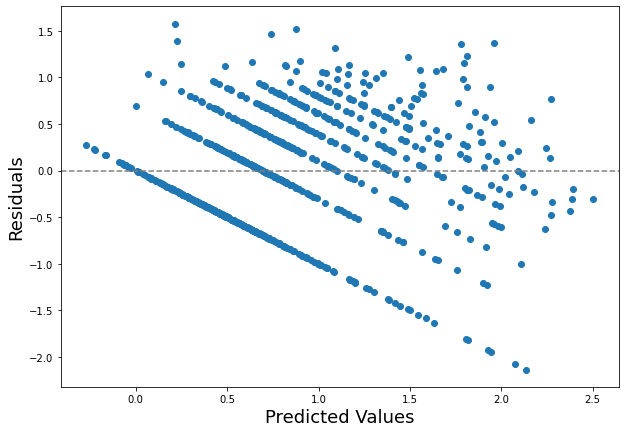

In [41]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);